In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
print(f"Old working dir {os.getcwd()}")
os.chdir('../../')
print(f"New working dir {os.getcwd()}")

Old working dir /home/alex/repos/conditional_quantile_function/notebooks/conformal
New working dir /home/alex/repos/conditional_quantile_function


In [3]:
from pathlib import Path

import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
results_dir = Path('./conformal_results_250912/')

In [5]:
from conformal.real_datasets.process_raw import datasets

In [19]:
n_targets = {"rf1": 8, "rf2": 8, "scm1d": 16, "scm20d": 16, "sgemm": 4, "bio": 2, "blog": 2}
df_n_targets = pd.DataFrame({"dataset_name": n_targets.keys(), "n_targets": n_targets.values()})
df_n_targets

,dataset_name,n_targets
0,rf1,8
1,rf2,8
2,scm1d,16
3,scm20d,16
4,sgemm,4
5,bio,2
6,blog,2


In [28]:
dataframes = []
seeds = range(10)
for seed in seeds:
    for dataset_name in datasets:
        fn = results_dir / dataset_name / str(seed) / f"metrics_all.feather"
        if fn.is_file():
            dataframes.append(pd.read_feather(fn))
        else:
            print(f"Error: dataset {dataset_name}, seed {seed} not found.")
df = pd.concat(dataframes).merge(df_n_targets, on="dataset_name")
df["log_vol_d"] = np.log(df["volume"]) / df["n_targets"]
df.head()

Error: dataset scm1d, seed 7 not found.


/home/alex/repos/conditional_quantile_function/.venv/lib/python3.13/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,dataset_name,seed,method_name,method_name_mathtext,score_name,conformalizer,base_model_name,alpha,marginal_coverage,worst_slab_coverage,volume,n_targets,log_vol_d
0,rf1,0,OT-CP-Global,$\mathrm{OT}$-$\mathrm{CP}$,Signed Error,OTCPGlobalPredictor,RandomForest,0.1,0.8945,0.850267,6.714239e+04,8,1.389321
1,rf1,0,OT-CP-Local,$\mathrm{OT}$-$\mathrm{CP}$+,Signed Error,OTCPLocalPredictor,RandomForest,0.1,0.9040,0.788136,8.741819e-04,8,-0.880278
2,rf1,0,Ell-Local,$\mathrm{ELL}$-$\mathrm{local}$+,Signed Error,EllipsoidalLocal,RandomForest,0.1,0.8910,0.788079,2.223003e-11,8,-3.066197
3,rf1,0,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,SplitConformalPredictor,CVQRegressor,0.1,0.8955,0.664921,8.501831e+00,8,0.267535
4,rf1,0,RPB,$\mathcal{C}^{\mathrm{rpb}}$,MK Quantile,OTCPGlobalPredictor,CVQRegressor,0.1,0.8870,0.789474,9.716881e+04,8,1.435526


In [30]:
df["n_targets"].unique()

array([ 8, 16,  4,  2])

In [31]:
#df1 = df.merge(df_n_targets, on="dataset_name")

In [32]:
#df["dataset_name"].unique(), df_n_targets["dataset_name"].unique()

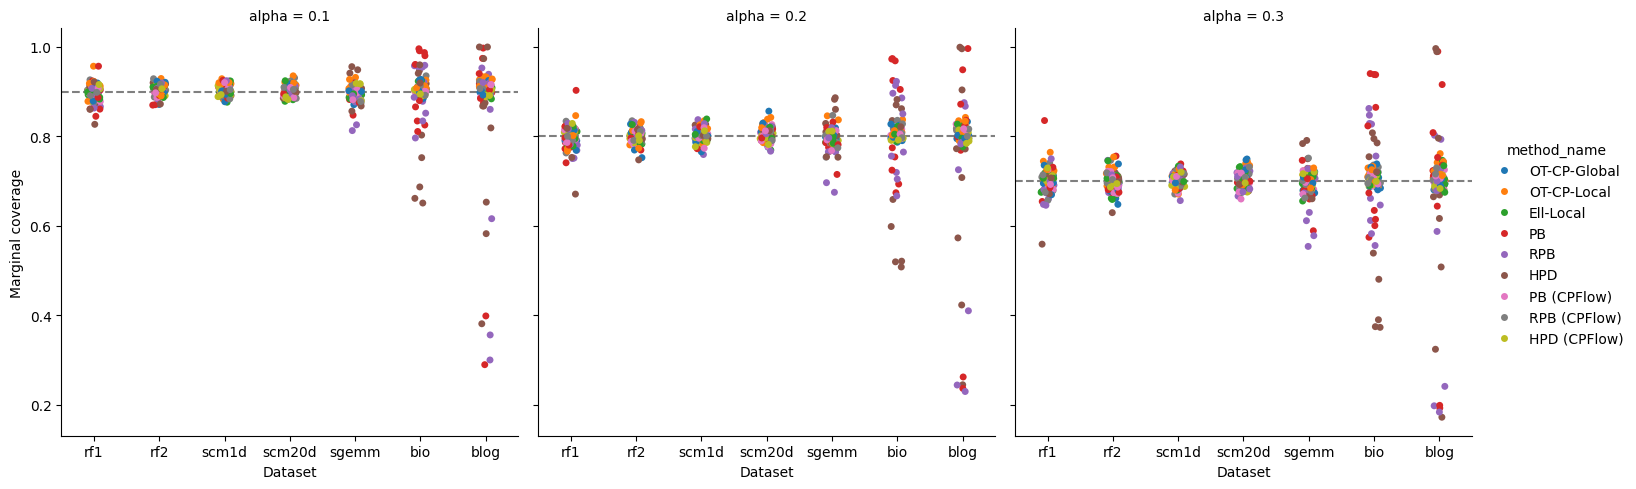

In [33]:
g_cov = sns.catplot(
    data=df, x="dataset_name", y="marginal_coverage", col="alpha", hue="method_name"
)
g_cov.set_axis_labels("Dataset", "Marginal coverage")
for alpha, ax in g_cov.axes_dict.items():
    ax.axhline(1 - alpha, ls="--", c="k", alpha=0.5)
for ax in g_cov.axes.flatten():
    ax.tick_params(labelbottom=True)

In [34]:
g_cov.axes_dict

{np.float64(0.1): <Axes: title={'center': 'alpha = 0.1'}, xlabel='Dataset', ylabel='Marginal coverage'>,
 np.float64(0.2): <Axes: title={'center': 'alpha = 0.2'}, xlabel='Dataset'>,
 np.float64(0.3): <Axes: title={'center': 'alpha = 0.3'}, xlabel='Dataset'>}

In [35]:
df

,dataset_name,seed,method_name,method_name_mathtext,score_name,conformalizer,base_model_name,alpha,marginal_coverage,worst_slab_coverage,volume,n_targets,log_vol_d
0,rf1,0,OT-CP-Global,$\mathrm{OT}$-$\mathrm{CP}$,Signed Error,OTCPGlobalPredictor,RandomForest,0.1,0.8945,0.850267,6.714239e+04,8,1.389321
1,rf1,0,OT-CP-Local,$\mathrm{OT}$-$\mathrm{CP}$+,Signed Error,OTCPLocalPredictor,RandomForest,0.1,0.9040,0.788136,8.741819e-04,8,-0.880278
2,rf1,0,Ell-Local,$\mathrm{ELL}$-$\mathrm{local}$+,Signed Error,EllipsoidalLocal,RandomForest,0.1,0.8910,0.788079,2.223003e-11,8,-3.066197
3,rf1,0,PB,$\mathcal{C}^{\mathrm{pb}}$,MK Rank,SplitConformalPredictor,CVQRegressor,0.1,0.8955,0.664921,8.501831e+00,8,0.267535
4,rf1,0,RPB,$\mathcal{C}^{\mathrm{rpb}}$,MK Quantile,OTCPGlobalPredictor,CVQRegressor,0.1,0.8870,0.789474,9.716881e+04,8,1.435526
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,blog,9,RPB,$\mathcal{C}^{\mathrm{rpb}}$,MK Quantile,OTCPGlobalPredictor,CVQRegressor,0.3,0.7000,0.675676,2.298531e+00,2,0.416135
1859,blog,9,HPD,$\mathcal{C}^{\mathrm{HPD}}$,Log Density,SplitConformalPredictor,CVQRegressor,0.3,0.5080,0.423841,1.314246e+02,2,2.439217
1860,blog,9,PB (CPFlow),$\mathcal{C}^{\mathrm{pb}}$ (CPFlow),MK Rank,SplitConformalPredictor,CPFlowRegressor,0.3,0.7115,0.742515,4.080735e-01,2,-0.448154
1861,blog,9,RPB (CPFlow),$\mathcal{C}^{\mathrm{rpb}}$ (CPFlow),MK Quantile,OTCPGlobalPredictor,CPFlowRegressor,0.3,0.7160,0.694444,5.991648e-01,2,-0.256109


In [36]:
metrics_columns = ["marginal_coverage", "worst_slab_coverage", "volume", "log_vol_d"]
id_vars = list(df.columns.difference(metrics_columns))
df_melted = pd.melt(df, id_vars=id_vars, value_vars=metrics_columns, var_name="metric", value_name="value")

In [37]:
len(df_melted)

7452

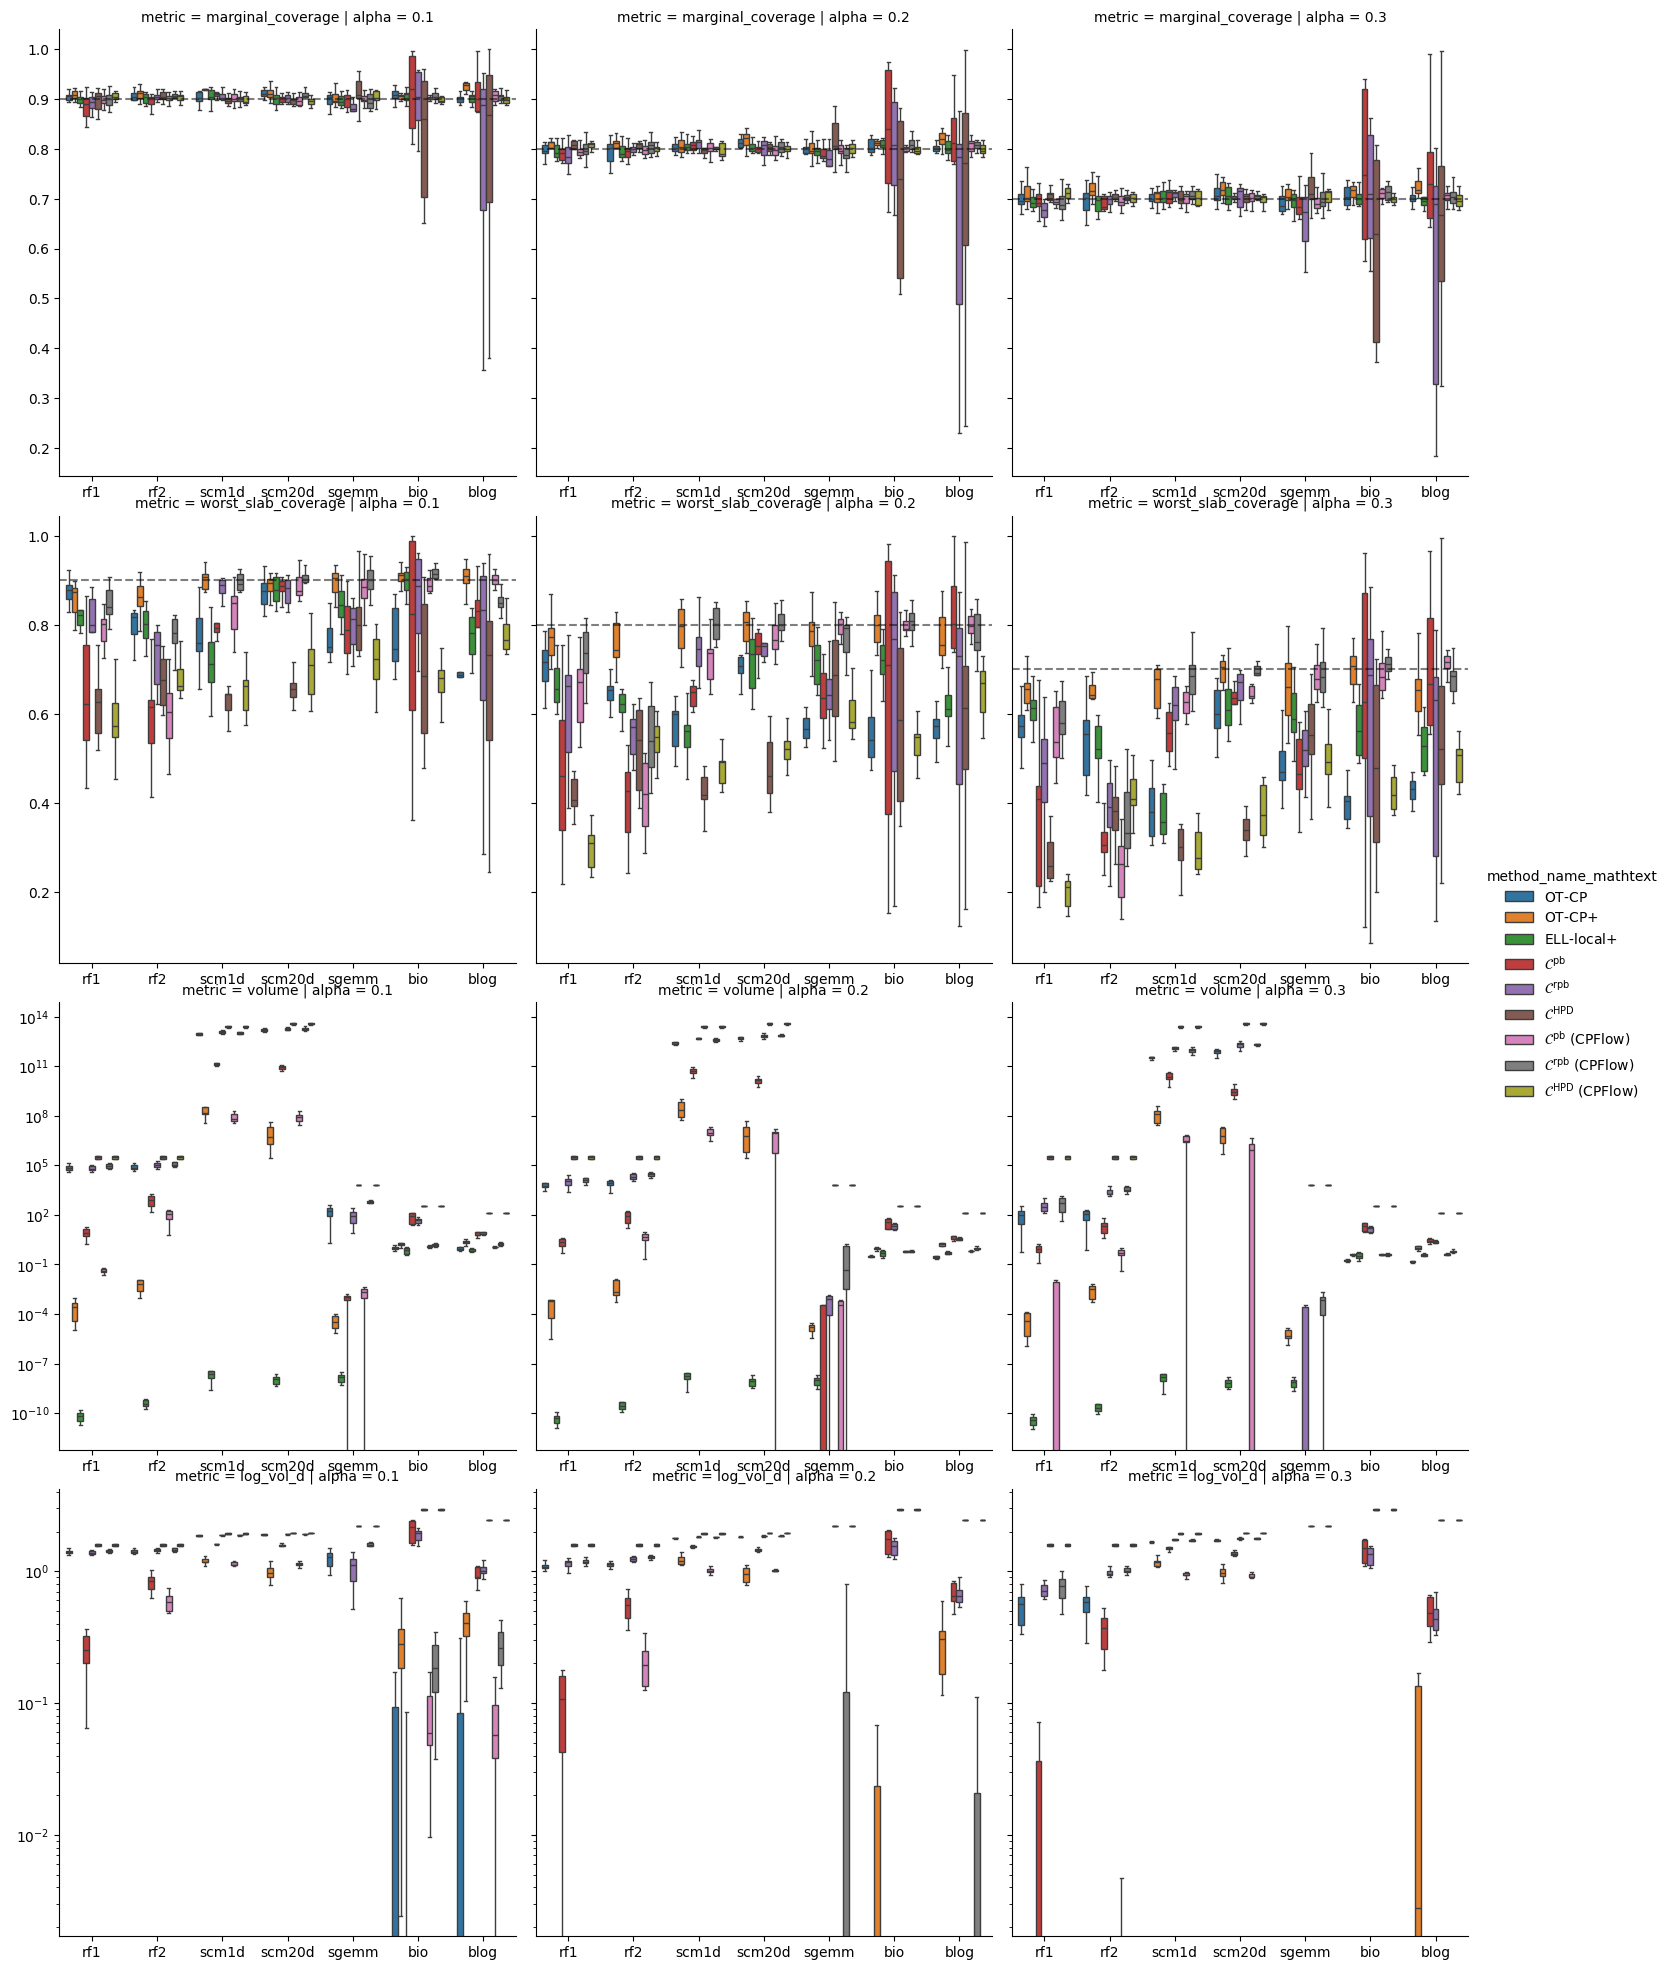

In [ ]:
g_all = sns.catplot(
    data=df_melted, kind="box", 
    x="dataset_name", y="value", col="alpha", row="metric", hue="method_name_mathtext",
    sharey="row", showfliers=False,
)
g_all.set_axis_labels("", "")
for (metric_name, alpha), ax in g_all.axes_dict.items():
    if "coverage" in metric_name:
        ax.axhline(1 - alpha, ls="--", c="k", alpha=0.5)
    if "volume" in metric_name:
        ax.set_yscale("log")
for ax in g_all.axes.flatten():
    ax.tick_params(labelbottom=True)

In [40]:
#g_all.axes_dict

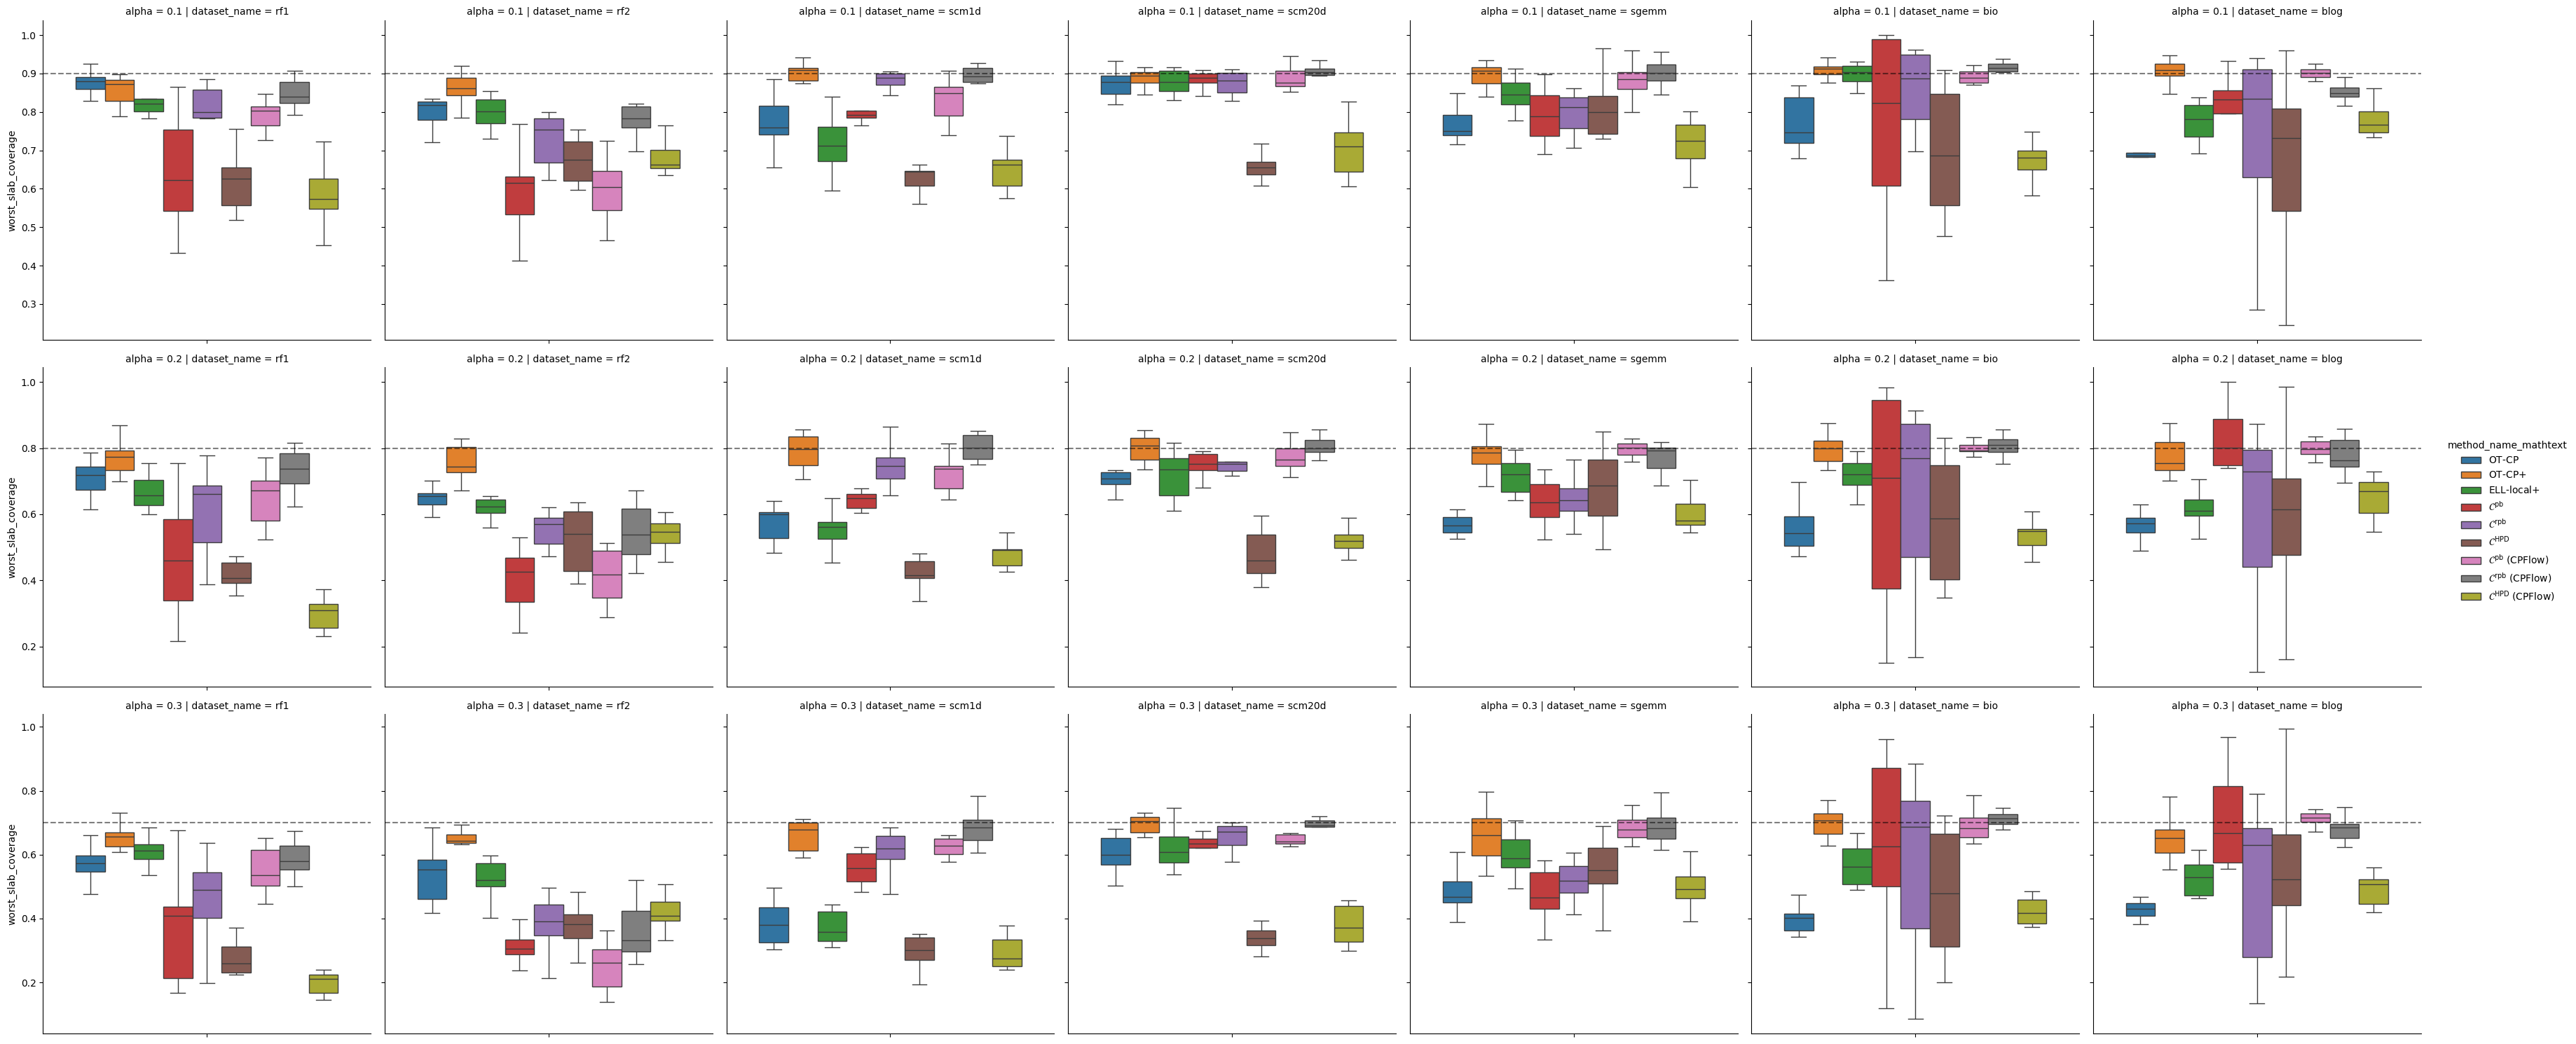

In [51]:
g_wsc = sns.catplot(
    data=df, kind="box", 
    y="worst_slab_coverage", row="alpha", col="dataset_name", hue="method_name_mathtext",
    sharey="row", showfliers=False,
)
#g_wsc.set_axis_labels("", "")
for (alpha, dataset_name), ax in g_wsc.axes_dict.items():
    ax.axhline(1 - alpha, ls="--", c="k", alpha=0.5)
for ax in g_wsc.axes.flatten():
    ax.tick_params(labelbottom=True)

In [48]:
#list(g_wsc.axes_dict.items())[0]

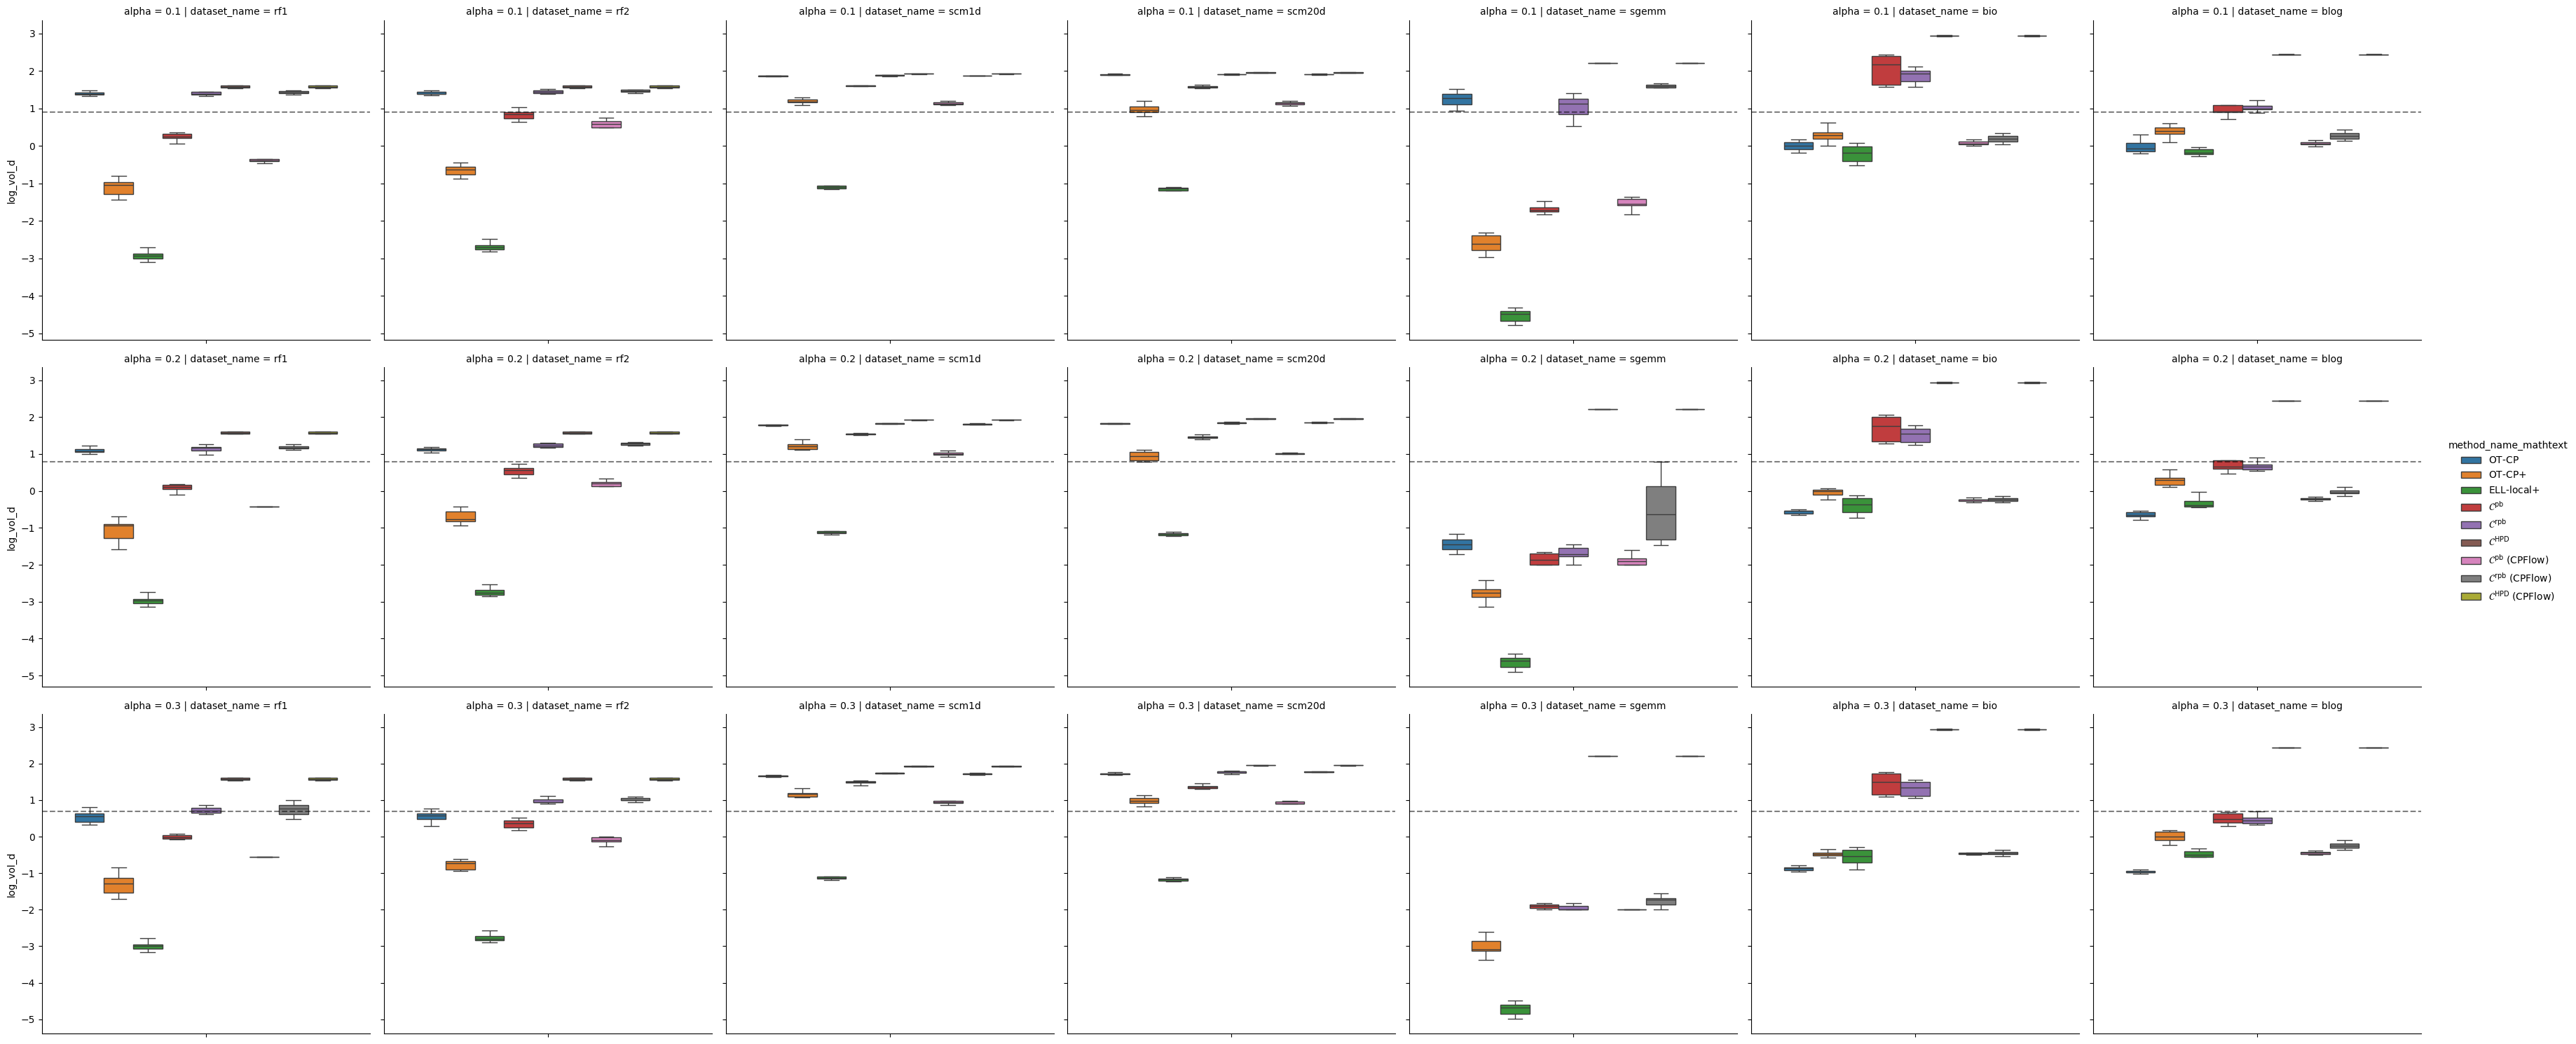

In [53]:
g_logvol = sns.catplot(
    data=df, kind="box", 
    y="log_vol_d", row="alpha", col="dataset_name", hue="method_name_mathtext",
    sharey="row", showfliers=False,
)
#g_logvol.set_axis_labels("", "")
for (alpha, dataset_name), ax in g_logvol.axes_dict.items():
    ax.axhline(1 - alpha, ls="--", c="k", alpha=0.5)
for ax in g_logvol.axes.flatten():
    ax.tick_params(labelbottom=True)